In [2]:

import base64
from datetime import datetime
import os
import shutil

import numpy as np
from PIL import Image
from flask import Flask
from io import BytesIO

from keras.models import load_model
import h5py
from keras import __version__ as keras_version

modelFn = 'model_center_andLeftRight_cropped_TwoTracks_NvidiaNet.h5'
# check that model Keras version is same as local Keras version
f = h5py.File(modelFn, mode='r')
model_version = f.attrs.get('keras_version')
keras_version = str(keras_version).encode('utf8')

if model_version != keras_version:
    print('You are using Keras version ', keras_version,
          ', but the model was built using ', model_version)

model = load_model(modelFn)

Using TensorFlow backend.
/Users/Steven/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [58]:
import cv2
import csv

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)        

refs = []
predicts = []

for line in lines[1:500]:
    filename = line[0].split('/')[-1]
    newPath = "data/IMG/" + filename
    x = cv2.imread(newPath)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = np.array(x)
    x = np.reshape(x, (1,160,320,3))
    
    ref = float(line[3])
    steering_angle = float(model.predict(x, batch_size=1))
    
    refs.append(ref)
    predicts.append(steering_angle)


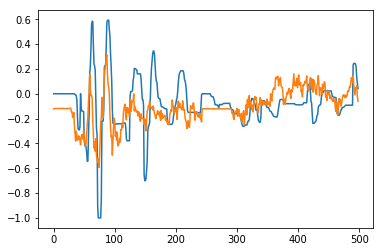

In [59]:
import matplotlib.pyplot as plt

plt.plot(refs)
plt.plot(predicts)
plt.show()

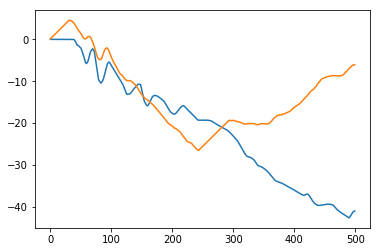

In [50]:

plt.plot(np.cumsum(refs))
plt.plot(np.cumsum(predicts))
plt.show()